<a href="https://colab.research.google.com/github/yubars/ML-and-Cybersecurity-projects/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab Assignment1: Linear Regression Model
In this lab, Linear Regression Model has trained, validated and applied model to predict temperature based on Cricket Chirp rate. From the visualization of data, learned model can be observed alongwith evolution of loss during training. This exercise demonstrates that how features can be set in tensorflow to train model and applied polyfit to infer a real-valued target feature based on previously unknown real-valued input feature(s). Additionally, model performance (accuracy) has beed evaluated using Root Mean Squared Error (RMSE).

**Data source:** https://www.globe.gov/explore-science/scientists-blog/archived-posts/sciblog/index.html_p=45.html


## 1. Training Linear Regression Model

### 1.1 Imports 
First, some libraries including numpy, pandas, matplotlib, sklearn and tensorflow have been imported

In [ ]:
import math
import io
import numpy as np
import pandas as pd
from IPython import display
from matplotlib import cm 
from matplotlib import gridspec 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from time import time as epoc  
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # we could disable 2 TFv2 
print("Required libraries have imported")

Required libraries have imported


### 1.2 Data Set
Cricket Chirps  Vs temperature data has been taken from https://www.globe.gov/explore-science/scientists-blog/archived-posts/sciblog/index.html_p=45.html
Here Chirps per 15 sec and tepterature in Fahrenheit has chosen. Dataset can be uploaded from local drive(commented part below) but I uploaded csv file first in google drive and downloaded from google dive using ID as shown below so that dataset can be available anytime and share to others as well

In [ ]:
# from google.colab import files
# uplo = files.upload()

Saving cricket_chirps.csv to cricket_chirps.csv


In [ ]:
# my_data = pd.read_csv(io.BytesIO(uplo['cricket_chirps.csv']))

In [ ]:
# my_data.head()

,c_chirps,temp
0,44.0,80.5
1,46.4,78.5
2,43.6,78.0
3,35.0,73.5
4,35.0,70.5


In [ ]:
#select and upload dataset (*.csv) file from the local drive and import it into a pandas dataframe
###from google.colab import files
###uploaded = files.upload()
#data_set= pd.read_csv(io.BytesIO(uploaded['cricket_chirps.csv']))

!gdown --id 1JgmHiDqi0JCK7kYgKBm-wgqLb3QPjI6T

data_set= pd.read_csv('cricket_chirps.csv', names=['c_chirps', 'temp'], skiprows=1)
# data_set = pd.read_csv('cricket_chirps.csv')
X=data_set['c_chirps'] *4 # feature(s) to train model
y = data_set['temp']   #target/label


In [ ]:
# len(X), len(y)

(55, 55)

###1.3 Splitting the dataset into train, valid and test set. 
Training data is set of data used for learning (by the model). Validation data is set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters. And Test data is set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [ ]:
# In the first step we will split the data in training  and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, random_state=20)
#Now since we want the test dataset 40% each of remaining data, we  have to define valid_size=0.6
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.4, random_state=18)
print("Number of training, validation and test data are:", len(X_train),len(X_valid), len(X_test))

Number of training, validation and test data are: 38 10 7


In [ ]:
# train_X, rem_X,train_y,rem_y = train_test_split(X, y, train_size=0.8, random_state= 21)

In [ ]:
# len(rem_X), len(rem_y),len(train_X), len(train_y)

(11, 11, 44, 44)

In [ ]:
# val_X, test_X, val_y, test_y =train_test_split(rem_X, rem_y, test_size=0.5, random_state=20, shuffle=True)

### 1.4 Using a Scatter Plot to Visualize the Data
I have used subplots here to visualize all training, validatation and test set together with scatter plots. 

[]

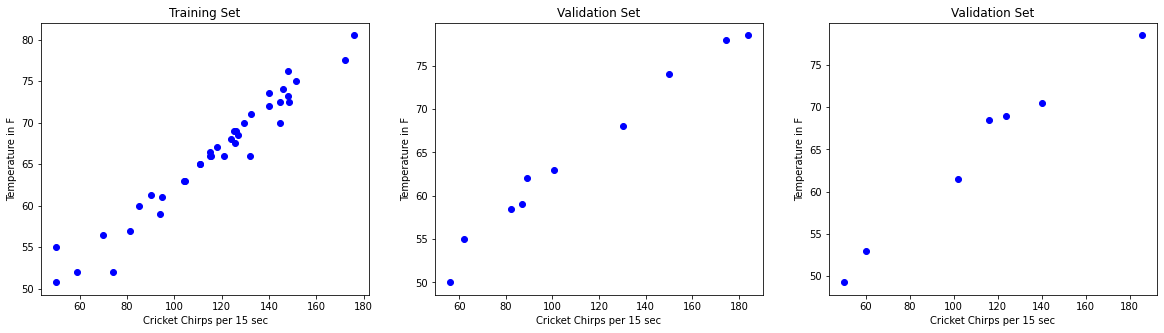

In [ ]:
# Visualization of data (input and output) for Temperature based on Cricket chirps per 15 sec
fig, (fig1,fig2,fig3) = plt.subplots(1,3, figsize=(20,5))
fig1.set_title("Training Set")
fig1.scatter(X_train,y_train, c='blue')
fig1.set_xlabel("Cricket Chirps per 15 sec")
fig1.set_ylabel("Temperature in F")

fig2.set_title("Validation Set")
fig2.scatter(X_valid,y_valid, c='blue')
fig2.set_xlabel("Cricket Chirps per 15 sec")
fig2.set_ylabel("Temperature in F")

fig3.set_title("Validation Set")
fig3.scatter(X_test,y_test, c='blue')
fig3.set_xlabel("Cricket Chirps per 15 sec")
fig3.set_ylabel("Temperature in F")
plt.plot()

### 1.5 Using polyfit to find the line that minimizes Root Mean Squared Error(RMSE)
To find the line that minimizes the squared error with respect to a set of points, and  to help see what the optimal solution looks like we wil use **polyfit** to compute the optimal solution with low RMSE and then add that to our plot.

In [ ]:
# Training model using training set data (input and output) for Temperature based on Cricket chirps per 15 sec
#apply polyfit for linear model
train_opt = np.polyfit(X_train,y_train, 1)
#extract slope(weight) and intercept(bia)
weight = train_opt[0]
bias = train_opt[1]
#predict target variable 
y_pred = weight * (X_train.astype(float)) + bias
#calculate RMSE
train_opt_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y_train))
print("Optimal Training RMSE =", train_opt_rmse, "with weight", weight, "and Bias", bias)

Optimal Training RMSE = 1.5424114133254117 with weight 0.2293431184096807 and Bias 39.443652921004364


In [ ]:
# val_opt = np.polyfit(X_valid,y_valid, 1)
# weight1 =val_opt[0]
# bias1 = val_opt[1]

# test_opt = np.polyfit(X_test,y_test, 1)
# weight2 =test_opt[0]
# bias2 = test_opt[1]
# weight1, weight2


(0.21187987521674476, 0.21846754006953942)

### 1.6 Visualizing a Linear Model Using a Scatter Plot

linear regression model has plotted using scatter_plot function passing argument such as  features, target, weight, bias as well as model names over a single variable, a really nice thing to be able to do, is to show the model (which is just a line) as part of the scatter plot. That really helps us to see how well the model fits the data. Just looking at the loss (RMSE here) doesn't really indicate how good the model is. Sometimes you want to show several models on the same scatter plot to compare them so we allow slopes, biases, and model_names to all be lists. They should be of the same size giving the weight (slope), bias, and name (to use in the legend) for the model.

In [ ]:
# Function to find the linear model based on the training data (input and output) for Temperature in F based on Cricket chirps per 15 sec

def scatter_plot(features, targets, slopes=[], biases=[], model_names=[]):
  """ Creates a scatter plot of input_feature vs target along with the models.
  Args:
    features: list of the input features
    targets: list of targets
    slopes: list of model weight (slope) 
    bias: list of model bias (same size as slopes)"""
    # Define some colors to use that go from red towards blue
  colors = [cm.coolwarm(x) for x in np.linspace(1, 0, len(slopes))]
  
  # Generate the Scatter plot
  plt.xlabel("Cricket Chirps per 15 sec")
  plt.ylabel("Temp (F)")
  plt.scatter(features, targets, color='blue', label=" Training data")
 
  # Add the lines corresponding to the provided models
  for i in range (0, len(slopes)):
    y_0 = slopes[i] * min(features) + biases[i]
    y_1 = slopes[i] * max(features) + biases[i]
   
    plt.plot([min(features), max(features)], [y_0, y_1],
             label=model_names[i], color=colors[i])
       
  if (len(model_names) > 0):
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

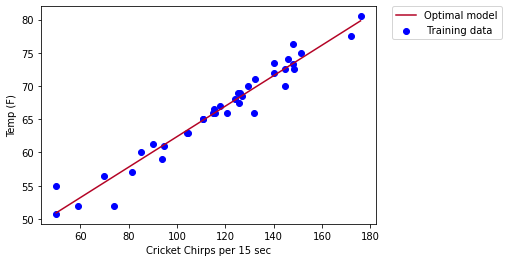

In [ ]:
scatter_plot(X_train, y_train, [weight], [bias], ["Optimal model"])


##2. Validation of the learned model 
Validation of learned model with validation data and finding the validation errors and its comparison with training error

In [ ]:
#calculate target feature using same weight abd bias but validation input data
y_valid_pred = weight * X_valid.astype(float) + bias
#calculate validation RMSE and compare it with training RMSE
validation_rmse = math.sqrt(metrics.mean_squared_error(y_valid_pred,y_valid))
print("Valication RMSE =", validation_rmse, "for weight", weight, "and bias", bias)
print("Training RMSE =", train_opt_rmse,  "for weight", weight, "and bias", bias)
print("Valication RMSE and Trainig RMSE error % =", abs(validation_rmse - train_opt_rmse)/train_opt_rmse *100)


Valication RMSE = 1.6049443769672895 for weight 0.9173724736387228 and bias 39.443652921004364
Training RMSE = 1.5424114133254117 for weight 0.9173724736387228 and bias 39.443652921004364
Valication RMSE and Trainig RMSE error % = 4.0542337214075665


In [ ]:
#calculate target feature using same weight abd bias but test input data
y_test_pred = weight * X_test.astype(float) + bias
#calculate Test RMSE and compare it with training RMSEy_test_pred = weight * X_test.astype(float) + bias
test_rmse = math.sqrt(metrics.mean_squared_error(y_test_pred,y_test))
print("Test RMSE =", test_rmse, "for weight", weight, "and bias", bias)
print("Training RMSE =", train_opt_rmse,  "for weight", weight, "and bias", bias)
print("Test RMSE and Trainig RMSE error % =", abs(test_rmse - train_opt_rmse)/train_opt_rmse *100)

Test RMSE = 1.9002025360385795 for weight 0.9173724736387228 and bias 39.443652921004364
Training RMSE = 1.5424114133254117 for weight 0.9173724736387228 and bias 39.443652921004364
Test RMSE and Trainig RMSE error % = 23.19686690736919


##3. Inferencing/Prediction
In this section, Inference has been done using learned linear regression model developed above. Now temperature in Fahrenheit has predicted for new and unknown value of X (input features) not available in all training, validation and testing dataset

In [ ]:
#@title Inferencing/Predicting for 
X_New =  36#@param {type:"number"}


In [ ]:
#@title Predictiing for
X_New =  24#@param{type:"number"}

In [ ]:
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess2:
  sess2.run(init)
  # New Value 
  x_i = tf.compat.v1.placeholder(tf.float32)
  curr_W = weight
  curr_b = bias
  YY= curr_W *x_i + curr_b 
  Y_NEW = sess2.run(YY, {x_i: X_New})
  print(f"For {X_New} Cricket's Chirps per 15 sec, the predicted temperature is {int(Y_NEW)}  degree Fahrenheit")


For 36 Cricket's Chirps per 15 sec, the predicted temperature is 47  degree Fahrenheit


### **Conclusion**
In this Linear Regression lab, a dataset containing Cricket chirps and corresponding temerature is used to train model. Here I have saved data in my google drive as csv file and downloaded using file id. First necessary libraries have imported including pandas and sklearn. Then dataset is splitted in training, validation and test datasets using sklern's train_test_split method with 70% data allocated for learning and remaining data for validation and test set. Validation and test datasets are use almost for similar purpose, either one works along with traing dataset. Specifically,validation data is set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters where as test data is set of data used to provide an unbiased evaluation of a final model fitted on the training dataset. 

Scatter plot is used to plot the points to visualize how data looks like. Then Numpy polyfit method is used to fit the line (linear regression model) in scallter plot. Here last argument of polyfit method is 1, indicating linear model. If we need quadratic model, we can use 2 here. Here both weight and bias are calcuated as 
$$
y = wx + b
$$
where $w$ is commonly known as the *weight*, and $b$ is commonly known as the *intercept*.

Polyfit helps to find optimal solution with least possible Root Mean Squred Error(RMSE). RMSE quantitavely shows how the learned model is fitted in applied dataset i.e. trainng, validation and testing datasets. 
$$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}\left ( y_{i} - \hat y_{i} \right )^2}$$

where y = actual value in the data set ;  $\hat y$ = value computed by solving the regression equation
By squaring the difference, we can adress positive and negative difference and by dividing number of values, we get average difference between actual and projected values. 

In this assignment, I have observed minimum difference (4% only) between training RMSE and validation RMSE, indicaing that learned model from traing data closely fitted with validation dataset as well. But there is above 20% difference in training and testing RMSE, may be due to low number of data in test set. Sometimes, we should apply cross-validation to minimize RMSE values and to increase performances. 

Finally, based on new chirps data, almost accurate prediction of temperature has achieved by bnferencing from learned model for new unknown data.

My lab assignement link in colab https://colab.research.google.com/drive/1fYnH4k_U66JLPgTIdu1A5DdcrG-OXw41?usp=sharing